<a href="https://colab.research.google.com/github/Koallla/Data-Science/blob/hw3/Hw3.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')
df.head()
df.shape

(550, 7)

О скольки книгах хранит данные датасет? 550 книг

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.isna().sum()

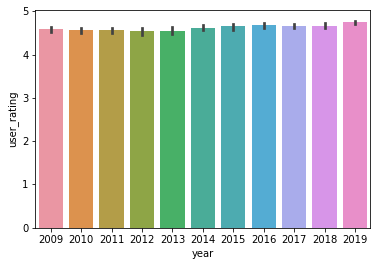

In [7]:
sns.barplot(y='user_rating', x='year', data=df)

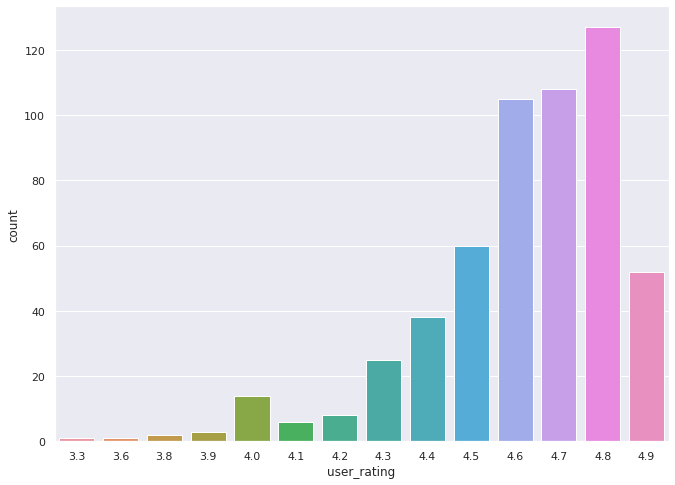

In [12]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="user_rating", data=df)

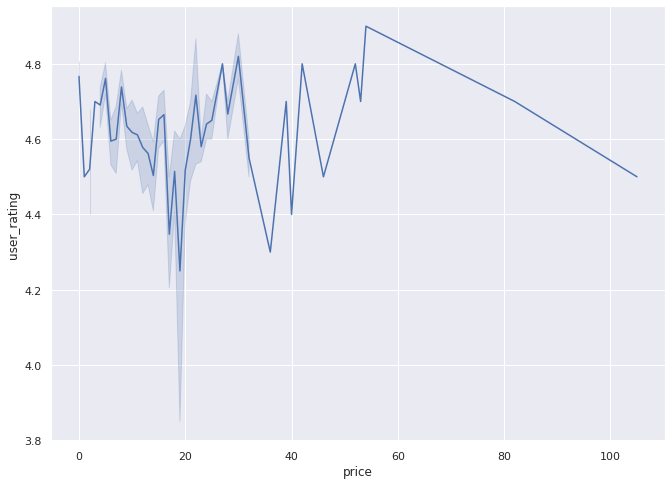

In [13]:
sns.lineplot(x='price', y='user_rating', data=df)

Есть ли в каких либо переменных пропуски? Нет

In [ ]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

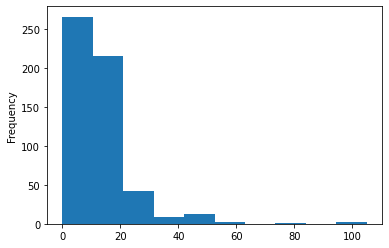

In [ ]:
df.price.plot(kind='hist')

In [ ]:
df.price.max()
df.price.min()
df.price.mean()
df.price.median()

11.0

Mаксимальная цена? 105
Минимальная цена? 0
Средняя цена? 13.1
Медианная цена? 11.0

In [ ]:
df.user_rating.max()

4.9

Какой рейтинг в датасете наивысший? Ответ: 4.9

In [ ]:
(df['user_rating'] == df.user_rating.max()).sum()

52

Сколько книг имеют такой рейтинг? Ответ: 52

In [ ]:
max_reviews = df.reviews.max()
df[df['reviews'] == max_reviews]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [ ]:
max_price_2015 = df[df.year == 2015].price.max()
index = df[df.year == 2015].price.sort_values()[-1:].index
df.iloc[index]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic... 

In [ ]:
((df.genre == 'Fiction') & (df.year == 2015)).sum()

17

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 17

In [ ]:
df_filter = df[df.year.isin([2010, 2011])]
df_filter[df_filter.user_rating == df_filter.user_rating.max()]
# df.name[((df.year==2010) | (df.year==2011)) & (df.user_rating == 4.9)].count()

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction



Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [ ]:
df_filter[-1:]

,name,author,user_rating,reviews,price,year,genre
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction





 

Какая книга последняя в отсортированном списке? Ответ: Women Food and God: An Unexpected Path to Almo...

In [ ]:
df.groupby('genre').agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Максимальная цена для жанра Fiction: 82

Минимальная цена для жанра Fiction: 0

Максимальная цена для жанра Non Fiction: 105

Минимальная цена для жанра Non Fiction: 0


In [ ]:
authors_count = df.groupby('author').agg(count_books = ('name', 'count'))
authors_count.shape
authors_count[authors_count.count_books == authors_count.count_books.max()]

,count_books
author,
Jeff Kinney,12


Какой размерности вышла таблица? Ответ: (248, 1)
Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney
Ответ: Сколько книг у этого автора? Ответ: 12

In [ ]:
users_raiting = df.groupby('author').agg(user_rating_mean = ('user_rating', 'mean'), user_rating_max = ('user_rating', 'max'), user_rating_min = ('user_rating', 'min'))
users_raiting[users_raiting.user_rating_mean == users_raiting.user_rating_mean.min()]

,user_rating_mean,user_rating_max,user_rating_min
author,,,
Donna Tartt,3.9,3.9,3.9


У какого автора средний рейтинг минимальный? Ответ: Donna Tartt
Какой у этого автора средний рейтинг? Ответ: 3.9

In [ ]:
# authors_count.shape
# users_raiting.shape.conc

conc = pd.concat([users_raiting[['user_rating_mean']], authors_count], axis=1, sort=True)
conc.sort_values(by=['user_rating_mean', 'count_books'])


,user_rating_mean,count_books
author,,
Donna Tartt,3.9,2
Muriel Barbery,4.0,1
Gillian Flynn,4.0,3
Gallup,4.0,9
Chris Cleave,4.1,1
...,...,...
Pete Souza,4.9,1
Bill Martin Jr.,4.9,2
Rush Limbaugh,4.9,2


Какой автор первый в списке? Donna Tartt